In [1]:
#loading model and importing necessary modules
from tensorflow.keras.applications import VGG16
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from tensorflow.keras.preprocessing import image as image_utils
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions

  
# load the VGG16 network *pre-trained* on the ImageNet dataset
model = VGG16(weights="imagenet")

553467096/553467096 [==============================] - 31s 0us/step


In [2]:
#loading model summary
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

(1200, 1800, 3)


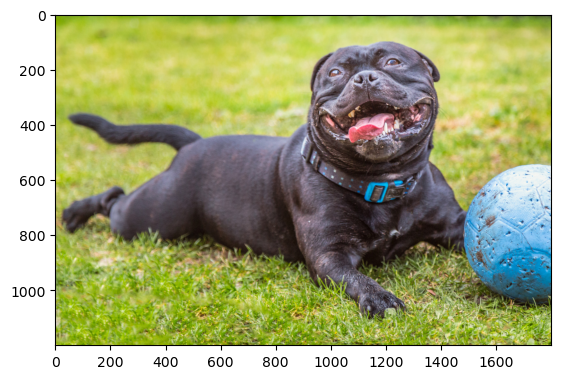

In [5]:
#loading and displaying an image from the dataset
def show_image(image_path):
    image = mpimg.imread(image_path)
    print(image.shape)
    plt.imshow(image)

show_image("data/doggy_door_images/happy_dog.jpg")

In [6]:
#preprocessing images

def load_and_process_image(image_path):
    # Print image's original shape, for reference
    print('Original image shape: ', mpimg.imread(image_path).shape)
    
    # Load in the image with a target size of 224, 224
    image = image_utils.load_img(image_path, target_size=(224, 224))
    # Convert the image from a PIL format to a numpy array
    image = image_utils.img_to_array(image)
    # Add a dimension for number of images, in our case 1
    image = image.reshape(1,224,224,3)
    # Preprocess image to align with original ImageNet dataset
    image = preprocess_input(image)
    # Print image's shape after processing
    print('Processed image shape: ', image.shape)
    return image

In [7]:
processed_image = load_and_process_image("data/doggy_door_images/brown_bear.jpg")

Original image shape:  (2592, 3456, 3)
Processed image shape:  (1, 224, 224, 3)


In [9]:
#passing image to our model to make a prediction

def readable_prediction(image_path):
    # Show image
    show_image(image_path)
    # Load and pre-process image
    image = load_and_process_image(image_path)
    # Make predictions
    predictions = model.predict(image)
    # Print predictions in readable form
    print('Predicted:', decode_predictions(predictions, top=3))

(1200, 1800, 3)
Original image shape:  (1200, 1800, 3)
Processed image shape:  (1, 224, 224, 3)
35363/35363 [==============================] - 0s 1us/step
Predicted: [[('n02093256', 'Staffordshire_bullterrier', 0.45095038), ('n02110958', 'pug', 0.32262966), ('n02099712', 'Labrador_retriever', 0.09343325)]]


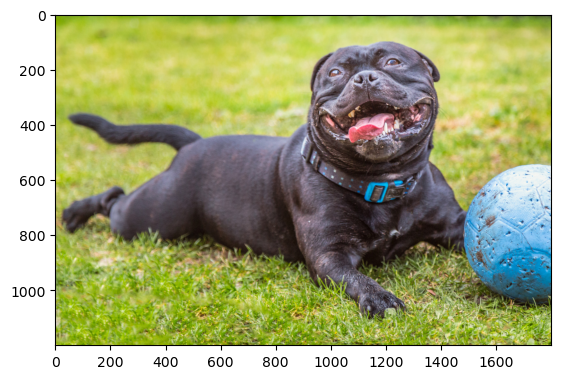

In [10]:
readable_prediction("data/doggy_door_images/happy_dog.jpg")

(2592, 3456, 3)
Original image shape:  (2592, 3456, 3)
Processed image shape:  (1, 224, 224, 3)
1/1 [==============================] - 0s 118ms/step
Predicted: [[('n02132136', 'brown_bear', 0.9853864), ('n02133161', 'American_black_bear', 0.0138762705), ('n02410509', 'bison', 0.00026586102)]]


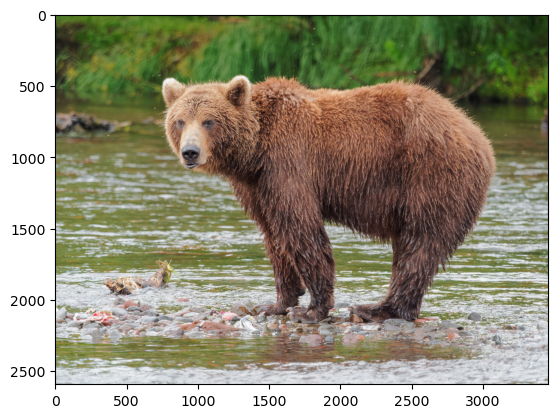

In [11]:
readable_prediction("data/doggy_door_images/brown_bear.jpg")

(1200, 1800, 3)
Original image shape:  (1200, 1800, 3)
Processed image shape:  (1, 224, 224, 3)
1/1 [==============================] - 0s 118ms/step
Predicted: [[('n02123159', 'tiger_cat', 0.73660624), ('n02124075', 'Egyptian_cat', 0.17488591), ('n02123045', 'tabby', 0.04588369)]]


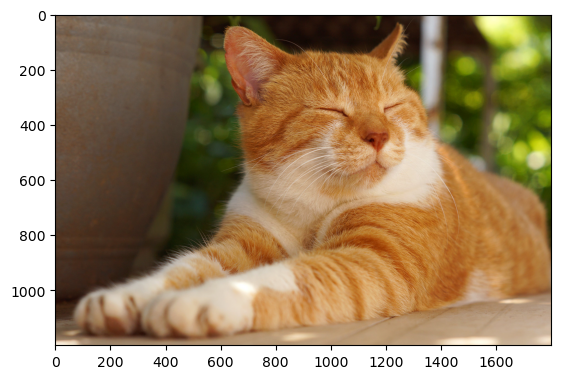

In [12]:
readable_prediction("data/doggy_door_images/sleepy_cat.jpg")

In [13]:
#training the model to only allow dogs in and out and keep cats in


def doggy_door(image_path):
    show_image(image_path)
    image = load_and_process_image(image_path)
    preds = model.predict(image)
    if 151 <= np.argmax(preds) <= 268:
        print("Doggy come on in!")
    elif 281 <= np.argmax(preds) <= 285:
        print("Kitty stay inside!")
    else:
        print("You're not a dog! Stay outside!")

(2592, 3456, 3)
Original image shape:  (2592, 3456, 3)
Processed image shape:  (1, 224, 224, 3)
1/1 [==============================] - 0s 119ms/step
You're not a dog! Stay outside!


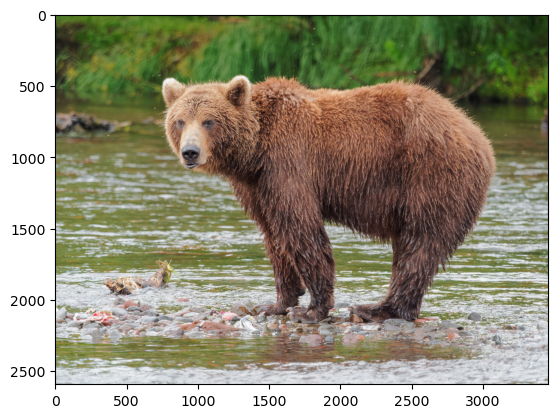

In [14]:
doggy_door("data/doggy_door_images/brown_bear.jpg")

(1200, 1800, 3)
Original image shape:  (1200, 1800, 3)
Processed image shape:  (1, 224, 224, 3)
1/1 [==============================] - 0s 120ms/step
Doggy come on in!


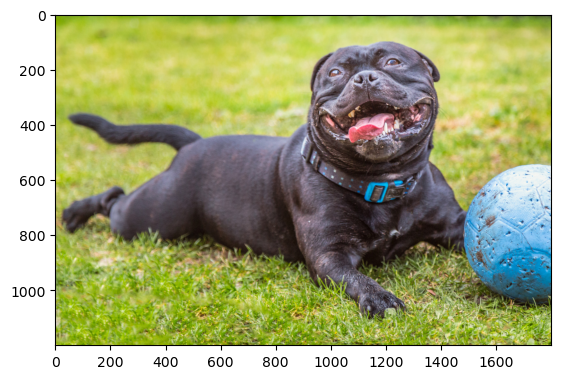

In [15]:
doggy_door("data/doggy_door_images/happy_dog.jpg")

(1200, 1800, 3)
Original image shape:  (1200, 1800, 3)
Processed image shape:  (1, 224, 224, 3)
1/1 [==============================] - 0s 115ms/step
Kitty stay inside!


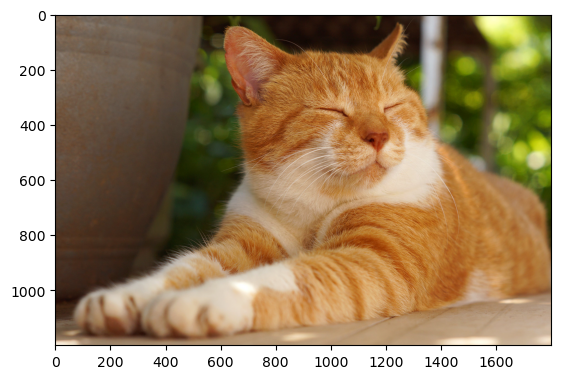

In [16]:
doggy_door("data/doggy_door_images/sleepy_cat.jpg")